# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Jihad Zakki Darajad
- **Email:** jihadzakki@gmail.com
- **ID Dicoding:** www.dicoding.com/users/jihadzakki

## Menentukan Pertanyaan Bisnis
Pada tahap ini, kita akan mendefinisikan berbagai pertanyaan bisnis yang akan digunakan sebagai kompas dalam proses eksplorasi data.

- Pertanyaan 1: Bagaimana performa jumlah pelanggan sepeda dalam kurun waktu dua tahun terakhir?
- Pertanyaan 2: Pada pukul berapa jumlah pelannggan sepeda paling banyak dan paling sedikit?
- Pertanyaan 3: Pada musim apa jumlah pelanggan sepeda paling banyak dan paling sedikit?
- Pertanyaan 4: Seberapa berpengaruh kondisi cuaca terhadap jumlah pelanggan sepeda?
- Pertanyaan 5: Bagaimana perbandingan jumlah pelanggan sepeda antara penyewa casual dan registered?

## Import Semua Packages/Library yang Digunakan

Untuk memulai pengerjaan proyek ini, kita perlu memanggil semua library yang dibutuhkan. Berikut merupakan kode untuk melakukannya.

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling
Setelah tahap persiapan selesai, kita bisa masuk ke tahap gathering data. Pada tahap ini, kita akan mengumpulkan semua data yang dibutuhkan.

### Gathering Data
Pada proyek ini, data yang akan kita gunakan terdiri dari 2 tabel, yaiut `day.csv` dan `hour.csv`. Oleh karena itu, pada tahap ini kita akan memuat kedua tabel tersebut.

In [119]:
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [120]:
hour_df = pd.read_csv("data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai tabel `day_df` 

- Memeriksa tipe data

In [121]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Terdapat kesalahan tipe data untuk kolom `dteday` dan nilai yang kurang mudah dipahami (kurang tepat) untuk kolom `season`, `yr`, `mnth`, `weekday`.

- Memeriksa missing value

In [122]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak terdapat missing value.

- Memeriksa duplikasi data

In [123]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


- Memeriksa parameter statistik

In [124]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Jika diperhatikan, tidak ada keanehan pada hasil tersebut. Ini menunjukkan tidak terdapat duplikasi dan keanehan nilai pada `day_df`.

#### Menilai tabel `hour_df` 

- Memeriksa tipe data

In [125]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Terdapat kesalahan tipe data untuk kolom `dteday`. Kolom tersebut harusnya direpresentasikan sebagai tipe data datetime, bukan object.

- Memeriksa missing value

In [126]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak terdapat missing value.

- Memeriksa duplikasi data

In [127]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


- Memeriksa parameter statistik

In [128]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Jika diperhatikan, tidak ada keanehan pada hasil tersebut. Ini menunjukkan tidak terdapat duplikasi dan keanehan nilai pada `hour_df`.

### Cleaning Data
Pada DataFrame day_df:
1. Mengkonversi tipe data `dteday` menjadi datetime
2. Memperbaiki tampilan nilai pada kolom `season`, `yr`, `mnth`, `weekday`

Pada DataFrame hour_df:
1. Memperbaiki tipe data `dteday` menjadi datetime 
2. Memperbaiki tampilan nilai pada kolom `season`, `yr`, `mnth`, `weekday`

#### Membersihkan tabel `day_df` 

1. Mengkonversi tipe data `dteday` menjadi datetime

In [129]:
# Mengkonversi dteday menjadi datetime
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Tipe data telah benar.

2. Memperbaiki tampilan nilai pada kolom `season`, `yr`, `mnth`, `weekday`

In [130]:
# Memperbaiki tampilan nilai pada kolom season

def correct_season(season):
    # Membuat dictionary untuk menghubungkan nomor musim (yang ada di tabel) dengan nama musim
    season_string = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
    # Mengembalikan nama musim yang sesuai dengan nomor musim yang diberikan
    return season_string.get(season)

# Membuat sebuah daftar kosong untuk menyimpan nama musim
season_list = []

# Iterasi melalui setiap nilai musim dalam kolom 'season' dari DataFrame 'day_df'
for season in day_df['season']:
    # Menggunakan fungsi find_season untuk mencari nama musim berdasarkan nomor musim
    season = correct_season(season)
    # Menambahkan nama musim ke dalam daftar season_list
    season_list.append(season)
    
# Memperbarui kolom 'season' dalam DataFrame 'day_df' dengan nama musim yang sesuai
day_df['season'] = season_list

day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [131]:
# Memperbaiki tampilan nilai pada kolom yr (dari integer menjadi tahun)

day_df["yr"] = day_df['dteday'].dt.year
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [132]:
# Memperbaiki tampilan nilai pada kolom mnth

day_df["mnth"] = day_df['dteday'].dt.month_name()
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [133]:
# Memperbaiki tampilan nilai pada kolom weekday (dari integer menjadi hari)

day_df["weekday"] = day_df['dteday'].dt.day_name()
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [134]:
day_df.to_csv("dashboard/cleaned_day_df.csv", index=False)

#### Membersihkan tabel `hour_df` 

1. Mengkonversi tipe data `dteday` menjadi datetime

In [135]:
# Mengkonversi dteday menjadi datetime
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Tipe data telah benar.

2. Memperbaiki tampilan nilai pada kolom `season`, `yr`, `mnth`, `weekday`

In [136]:
# Memperbaiki tampilan nilai pada kolom season

def correct_season(season):
    # Membuat dictionary untuk menghubungkan nomor musim (yang ada di tabel) dengan nama musim
    season_string = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
    # Mengembalikan nama musim yang sesuai dengan nomor musim yang diberikan
    return season_string.get(season)

# Membuat sebuah daftar kosong untuk menyimpan nama musim
season_list = []

# Iterasi melalui setiap nilai musim dalam kolom 'season' dari DataFrame 'day_df'
for season in hour_df['season']:
    # Menggunakan fungsi find_season untuk mencari nama musim berdasarkan nomor musim
    season = correct_season(season)
    # Menambahkan nama musim ke dalam daftar season_list
    season_list.append(season)
    
# Memperbarui kolom 'season' dalam DataFrame 'day_df' dengan nama musim yang sesuai
hour_df['season'] = season_list

hour_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [137]:
# Memperbaiki tampilan nilai pada kolom yr (dari integer menjadi tahun)

hour_df["yr"] = hour_df['dteday'].dt.year
hour_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [138]:
# Memperbaiki tampilan nilai pada kolom mnth

hour_df["mnth"] = hour_df['dteday'].dt.month_name()
hour_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [139]:
# Memperbaiki tampilan nilai pada kolom weekday (dari integer menjadi hari)

hour_df["weekday"] = hour_df['dteday'].dt.day_name()
hour_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [140]:
hour_df.to_csv("dashboard/cleaned_hour_df.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [141]:
# Melihat parameter numerik secara keseluruhan dari day_df
day_df.describe(include="all")

C:\Users\PM02\AppData\Local\Temp\ipykernel_19516\1804941881.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,12,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,NaN,January,NaN,Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,62,NaN,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,2011.500684,NaN,0.028728,NaN,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,NaN,0.167155,NaN,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,2011.000000,NaN,0.000000,NaN,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,2011.000000,NaN,0.000000,NaN,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


Berdasarkan rangkuman parameter statistik di atas, kita akan memperoleh informasi jumlah pelanggan dalam 731 hari yang datanya diambil dari tahun 2011 hingga 2012.

In [142]:
# Mencari performa jumlah tersewanya sepeda dalam kurun waktu dua tahun terakhir
day_df.groupby(by=["mnth","yr"]).agg({
    "cnt": "sum"
}).reset_index()

,mnth,yr,cnt
0,April,2011,94870
1,April,2012,174224
2,August,2011,136691
3,August,2012,214503
4,December,2011,87323
5,December,2012,123713
6,February,2011,48215
7,February,2012,103137
8,January,2011,38189
9,January,2012,96744


Dari informasi di atas, kita dapat sekilas melihat performa perusahaan di tiap bulannya. Perbandingan masing-masing bulan di tahun 2011 dan 2012 menunjukkan bahwa jumlah pelanggan di semua bulan tahun 2011 lebih rendah daripada tahun 2012. Informasi ini juga penting untuk internal perusahaan. Untuk memudahkan membaca hasil ini, kita dapat menggunakan plot line chart dari data ini. 

In [143]:
# Mencari musim apa jumlah tersewanya sepeda paling banyak dan paling sedikit
day_df.groupby(by=["season"]).agg({
    "cnt": "sum"
}).reset_index()

,season,cnt
0,Fall,1061129
1,Spring,471348
2,Summer,918589
3,Winter,841613


Dari informasi di atas, kita dapat melihat bahwa musim dengan jumlah pelanggan paling banyak pada musim gugur (fall), yaitu sebesar 1061129. Sedangkan musim dengan jumlah pelanggan paling sedikit terjadi pada musim semi (spring), yaitu sebesar 471348. Menurut saya ini merupakan informasi yang penting, karena mungkin secara logika musim dingin (winter) lah yang memiliki pelanggan paling dikit. Nyatanya, musim dingin bukanlah yang paling sedikit. Hal ini penting untuk perusahaan dan data ini dapat kita sajikan dalam bentuk pie chart ataupun bar chart.

In [144]:
# Mencari pengaruh kondisi cuaca terhadap jumlah tersewanya sepeda
day_df.groupby(by=["weathersit"]).agg({
    "cnt": "sum"
}).reset_index()

,weathersit,cnt
0,1,2257952
1,2,996858
2,3,37869


Keterangan dari README.md:
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Dapat ditarik informasi bahwa semakin buruk cuacanya (hujan/bersalju/petir/gelap), maka pelanggan juga akan semakin sedikit. Hal ini dapat divisualkan dengan bar chart ataupun pie chart.

In [145]:
# Mencari perbandingan jumlah penyewa sepeda antara penyewa casual dan registered
print("Jumlah penyewa casual: ", day_df['casual'].sum())
print("Jumlah penyewa registered: ", day_df['registered'].sum())
print("Jumlah penyewa total: ", day_df['cnt'].sum())

Jumlah penyewa casual:  620017
Jumlah penyewa registered:  2672662
Jumlah penyewa total:  3292679


Dari informasi di atas, kita dapat mengetahui bahwa dari total penyewa sebanyak 329679 memiliki detail jumlah penyewa casual sebanyak 620017 dan jumlah penyewa registered sebanyak 2672662. Informasi terkait jumlah jenis penyewa ini dapat menjadi salah satu bahan penting untuk penyesuaian strategi marketing perusahaan di masa depan.

### Explore `hour_df`

In [146]:
# Melihat parameter numerik secara keseluruhan dari hour_df
hour_df.describe(include="all")

C:\Users\PM02\AppData\Local\Temp\ipykernel_19516\2588946657.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,4,NaN,12,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,Fall,NaN,May,NaN,NaN,Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,4496,NaN,1488,NaN,NaN,2512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,NaN,2011.502561,NaN,11.546752,0.028770,NaN,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,NaN,0.500008,NaN,6.914405,0.167165,NaN,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,NaN,2011.000000,NaN,0.000000,0.000000,NaN,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,NaN,2011.000000,NaN,6.000000,0.000000,NaN,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


Berdasarkan rangkuman parameter statistik di atas, kita akan memperoleh informasi dalam 17379 jam yang datanya diambil setiap jam mulai pukul 00.00 hingga pukul 23.00 rentang 2011 hingga 2012 dengan rata-rata jam sebesar 11.546752. Informasi ini tentunya dapat memberikan gambaran terkait jumlah pelanggan paling banyak dan paling sedikit pada pukul berapa.

In [147]:
# Melihat jumlah penyewa sepeda di tiap jamnya
hour_df.groupby(by="hr").agg({
    "cnt": ["sum"]
}).reset_index()

,hr,cnt
,,sum
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001


Dari informasi di atas, kita dapat mengetahui bahwa jumlah tersewanya sepeda paling bayak terjadi pada pukul 17.00, yaitu sebesar 336860. Sedangkan, jumlah tersewanya sepeda paling sedikit terjadi pada pukul 04.00, yaitu sebesar 4428.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa jumlah pelanggan dalam kurun waktu dua tahun terakhir?

In [148]:
# Memperbaiki tampilan nilai pada kolom mnth
day_df["mnth"] = pd.Categorical(day_df["mnth"], categories=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


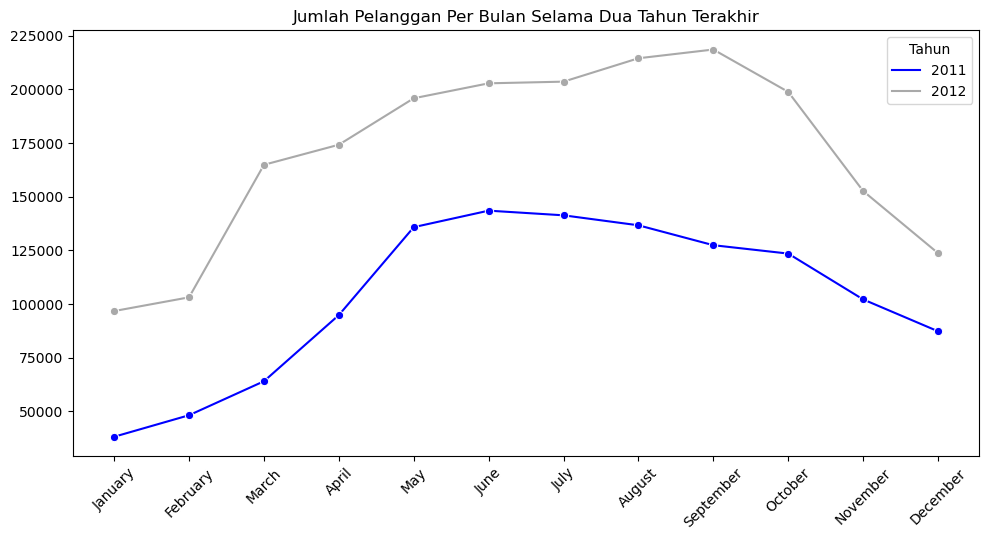

In [149]:
monthly_count = day_df.groupby(by=["mnth","yr"]).agg({
    "cnt": "sum"
}).reset_index()

# Membuat plot dengan ukuran gambar yang ditentukan
plt.figure(figsize=(10, 5))

# Mendefinisikan warna untuk setiap tahun
colors = {2011: 'blue', 2012: 'darkgrey'}

sns.lineplot(
    data=monthly_count,
    x="mnth",
    y="cnt",
    hue="yr",
    palette=colors,  # Menggunakan warna yang ditentukan sebelumnya
    marker="o")

plt.title("Jumlah Pelanggan Per Bulan Selama Dua Tahun Terakhir")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

Berdasarkan grafik di atas, terjadi peningkatan jumlah pelanggan yang signifikan dari 2011 hingga 2012.
Peningkatan ini tidak konsisten setiap bulannya dan beberapa bulan ada yang turun. Fluktuasi paling signifikan terjadi pada bulan Februari hingga Juli di kedua tahun. Pada akhir kedua tahun, terdapat penurunan jumlah pelanggan. Hal ini mungkin bisa berkaitan dengan musim atau cuaca pada bulan-bulan tersebut.

Kenaikan dan Penurunan:
- Kenaikan paling signifikan terjadi pada bulan Maret 2012 dengan lonjakan lebih dari 50.000 pelanggan.
- Penurunan paling signifikan terjadi pada bulan November 2012 dengan penurunan hampir 25.000 pelanggan.
- Di awal kedua tahun sama-sama memiliki tren pelanggan naik.
- Di akhir kedua tahun sama-sama memilikii tren pelanggan turun.

Perbandingan Tahun:
- Jumlah pelanggan di tahun 2012 secara konsisten lebih tinggi dibandingkan tahun 2011.

Secara keseluruhan, tren menunjukkan pertumbuhan positif apabila melihat perbandingan tahun.

### Pertanyaan 2: Pada pukul berapa jumlah pelanggan sepeda paling banyak dan paling sedikit?

In [150]:
sum_byhour_df = hour_df.groupby("hr").cnt.sum().sort_values(ascending=False).reset_index()
sum_byhour_df

,hr,cnt
0,17,336860
1,18,309772
2,8,261001
3,16,227748
4,19,226789
5,13,184919
6,12,184414
7,15,183149
8,14,175652
9,20,164550


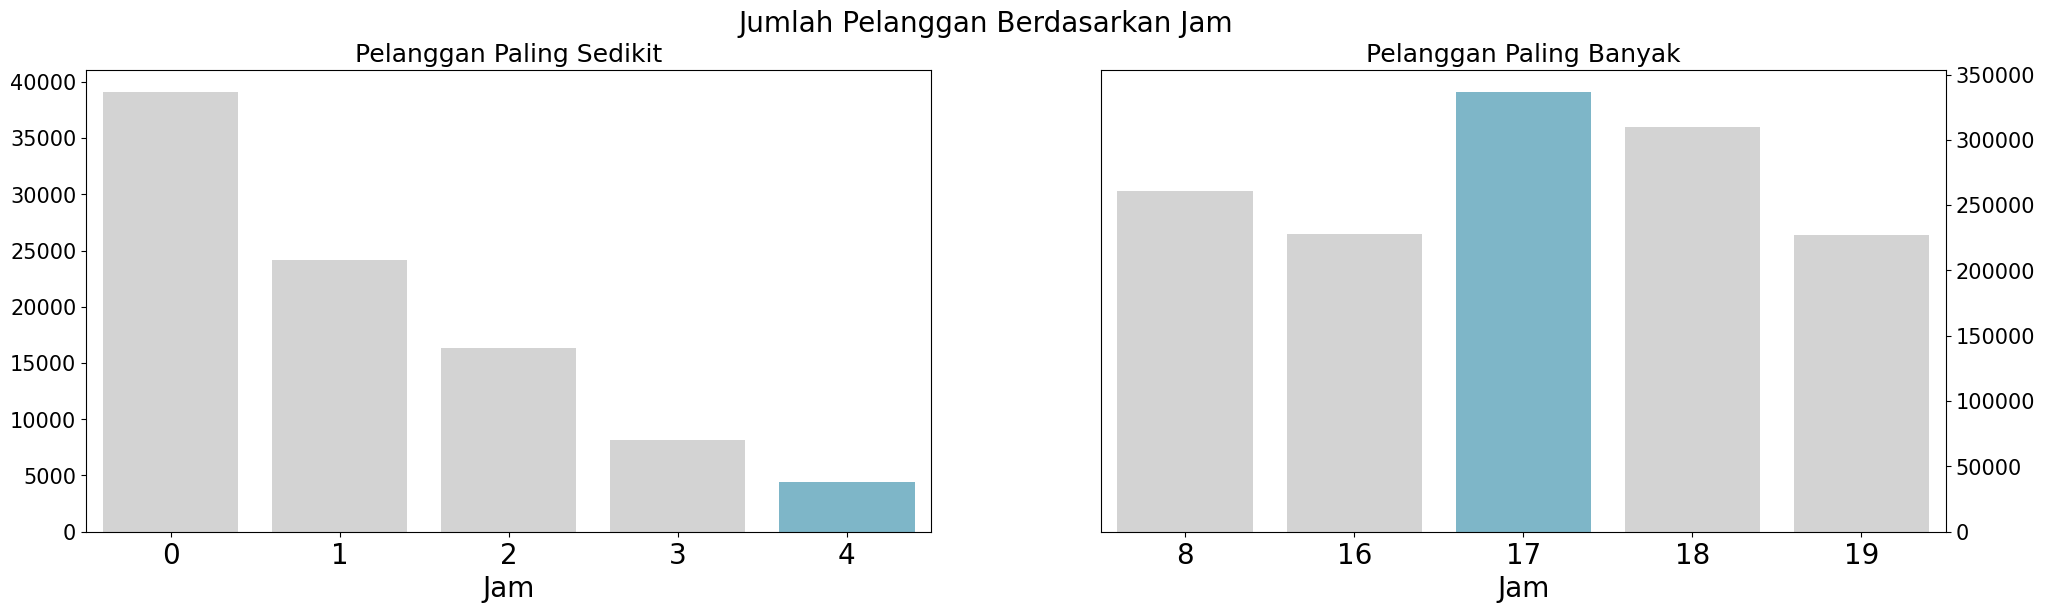

In [151]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

sns.barplot(x="hr", y="cnt", data=sum_byhour_df.sort_values(by="hr", ascending=True).head(5), palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4"], ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("Jam", fontsize=20)
ax[0].yaxis.set_label_position("right")
ax[0].set_title("Pelanggan Paling Sedikit", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=20)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="hr", y="cnt", data=sum_byhour_df.head(5), palette=["#D3D3D3", "#D3D3D3", "#72BCD4",  "#D3D3D3", "#D3D3D3"], ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Jam", fontsize=20)
ax[1].set_title("Pelanggan Paling Banyak", loc="center", fontsize=18)
ax[1].tick_params(axis ='x', labelsize=20)
ax[1].tick_params(axis ='y', labelsize=15)
ax[1].yaxis.tick_right()

plt.suptitle("Jumlah Pelanggan Berdasarkan Jam", fontsize=20)
plt.show()

Berdasarkan grafik di atas, dapat dilihat bahwa jumlah pelanggan paling banyak berada pada pukul 17.00 dan pelanggan paling sedikit berada pada pukul 04.00. Perbedaan sangat signifikan berkisar di ratusan ribu. Di waktu dini hari hingga subuh, pelanggan masih sangat sedikit. Berbeda ketika mulai masuk pukul 08.00 dan masuk ke sore hari sekitar 16.00 hingga 19.00, yang mungkin ini berkaitan dengan jam berangkat kerja dan pulang kerja para pekerja maupun anak sekolahan. 

### Pertanyaan 3: Pada musim apa jumlah pelanggan sepeda paling banyak dan paling sedikit?

In [152]:
# Data group ke season
sum_byseason_df = day_df.groupby("season").cnt.sum().sort_values(ascending=False).reset_index()
sum_byseason_df

,season,cnt
0,Fall,1061129
1,Summer,918589
2,Winter,841613
3,Spring,471348


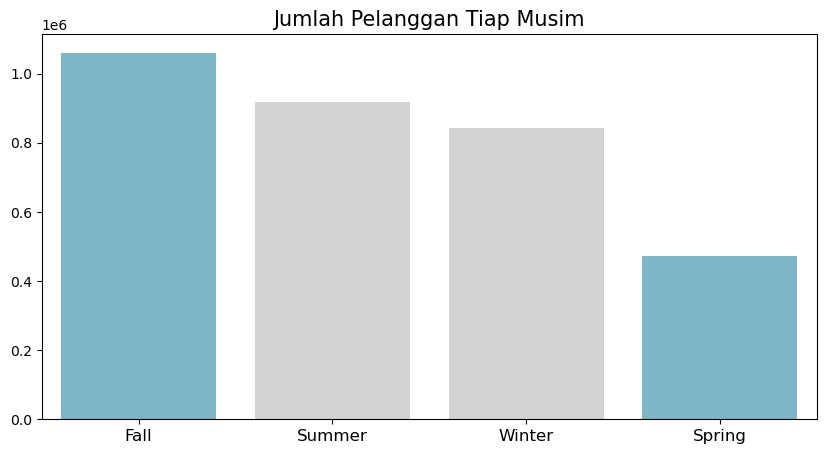

In [153]:
# Menentukan warna untuk setiap musim
colors = ("#72BCD4", "#D3D3D3", "#D3D3D3", "#72BCD4")

# Membuat plot dengan ukuran gambar yang ditentukan
plt.figure(figsize=(10, 5))

# Membuat bar plot dengan seaborn
sns.barplot(
    y="cnt",  # Nilai di sumbu y
    x="season",  # Nilai di sumbu x
    data=sum_byseason_df.sort_values(by="cnt", ascending=False),  # Data yang digunakan
    palette=colors  # Warna yang digunakan
)

# Plot
plt.title("Jumlah Pelanggan Tiap Musim", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

Berdasarkan grafik di atas, dapat dilihat bahwa jumlah pelanggan paling banyak berada pada musim gugur (fall) dan jumlah pelanggan paling sedikit berada pada musim semi (spring).

### Pertanyaan 4: Seberapa berpengaruh kondisi cuaca terhadap jumlah pelanggan sepeda?

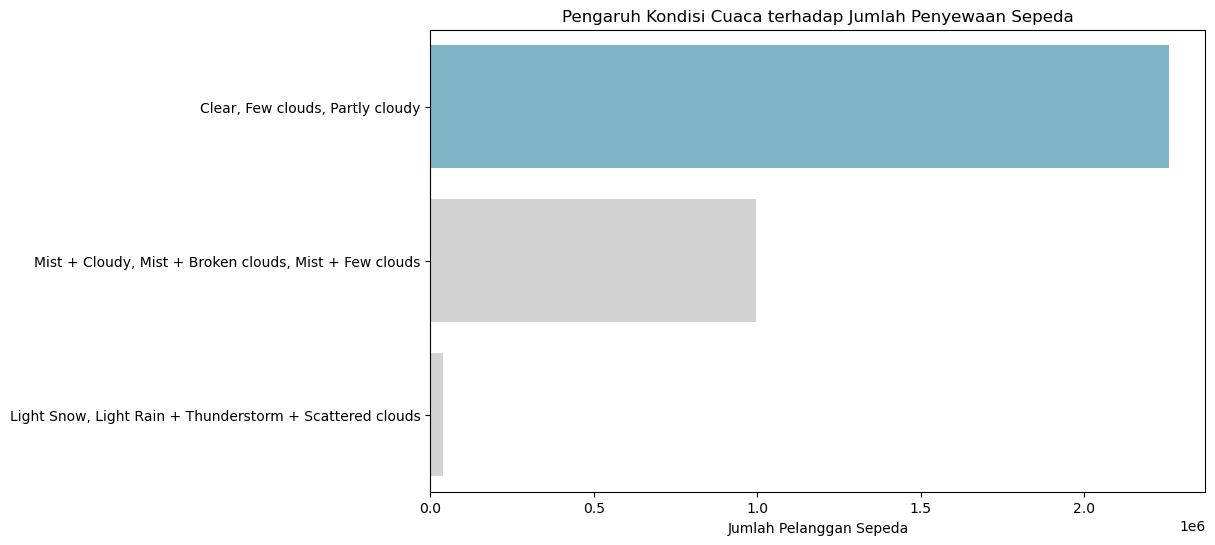

In [154]:
# Mapping angka menjadi label kondisi cuaca
weather_labels = {
    1: 'Clear, Few clouds, Partly cloudy',
    2: 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds',
    3: 'Light Snow, Light Rain + Thunderstorm + Scattered clouds',
    4: 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'
}

# Mengganti nilai angka weathersit dengan label kondisi cuaca
day_df['weather_label'] = day_df['weathersit'].map(weather_labels)

# Menghitung total jumlah penyewaan sepeda untuk setiap kondisi cuaca
weather_counts = day_df.groupby('weather_label')['cnt'].sum().reset_index()

# Mengurutkan DataFrame berdasarkan jumlah penyewaan sepeda
weather_counts_sorted = weather_counts.sort_values(by='cnt', ascending=False)

# Membuat bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=weather_counts_sorted, x='cnt', y='weather_label', palette=[ "#72BCD4",  "#D3D3D3", "#D3D3D3", "#D3D3D3"])
plt.xlabel('Jumlah Pelanggan Sepeda')
plt.ylabel(None)
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.show()


Dalam grafik di atas, terlihat bahwa jumlah pelanggan sepeda cenderung berkurang seiring dengan memburuknya kondisi cuaca, dan sebaliknya. Artinya, semakin buruk cuaca, jumlah pelanggan sepeda semakin sedikit, sementara semakin baik cuaca, jumlah pelanggan sepeda cenderung jauh lebih tinggi.

### Pertanyaan 5: Bagaimana perbandingan jumlah pelanggan sepeda antara penyewa casual dan registered?

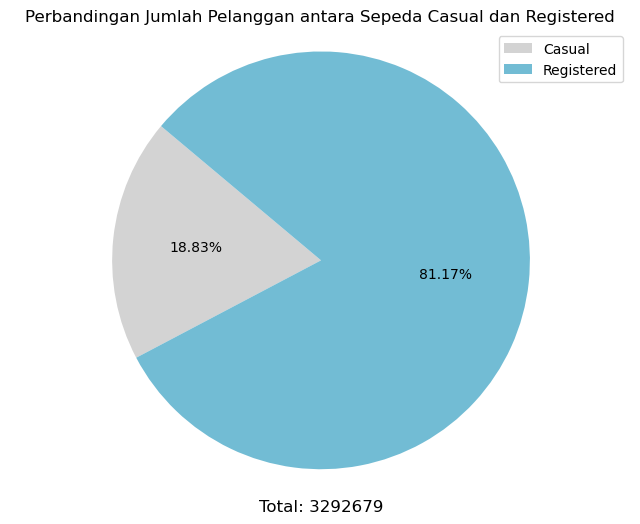

In [168]:
# Data
labels = ['Casual', 'Registered']
sizes = [day_df['casual'].sum(), day_df['registered'].sum()]
 
# Plot Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=None, colors=['#D3D3D3','#72BCD4'], autopct='%1.2f%%', startangle=140)
plt.title('Perbandingan Jumlah Pelanggan antara Sepeda Casual dan Registered')
plt.axis('equal')  # Membuat pie chart menjadi lingkaran
plt.legend(labels, loc='best')  # Menampilkan legenda

# Menambahkan jumlah angka
total = sum(sizes)
plt.text(0.3, -1.2, f'Total: {total}', fontsize=12, ha='right')

plt.show()

Berdasarkan grafik di atas, dapat dilihat bahwa dari total jumlah pelanggan sebanyak 3.292.679, sebanyak 81.17% sudah menjadi pelanggan terdaftar (registered) ke perusahaan, sedangkan sisanya (18.83%) belum terdaftar sebagai pelanggan tetap (casual).

## Conclusion

- Conclusion Pertanyaan 1: Bagaimana performa jumlah tersewanya dalam kurun waktu dua tahun terakhir?
> Dalam dua tahun terakhir, jumlah pelanggan sepeda mengalami peningkatan signifikan dengan fluktuasi bulanan yang terjadi. Meskipun terdapat kenaikan dan penurunan pada beberapa periode, performa keseluruhan tahun 2012 lebih baik daripada tahun 2011.

- Conclusion Pertanyaan 2: Pada pukul berapa jumlah tersewanya sepeda paling banyak dan paling sedikit?
> Berdasarkan analisis grafik, jumlah pelanggan sepeda mencapai puncak tertinggi pada pukul 17.00, sementara jumlah pelanggan paling sedikit terjadi pada pukul 04.00. Perbedaan antara dua titik ini sangat signifikan, dengan perbedaan jumlah pelanggan mencapai ratusan ribu. Pada jam-jam dini hari hingga subuh, jumlah pelanggan masih sangat sedikit, namun meningkat secara signifikan mulai pukul 08.00 hingga sore hari sekitar pukul 16.00 hingga 19.00. Fenomena ini kemungkinan besar terkait dengan jam berangkat dan pulang kerja bagi pekerja dan pelajar. Dengan demikian, jam merupakan salah satu faktor penting dalam menentukan tingkat permintaan penyewaan sepeda.

- Conclusion Pertanyaan 3: Pada musim apa jumlah tersewanya sepeda paling banyak dan paling sedikit?
> Berdasarkan analisis grafik, jumlah pelanggan sepeda paling banyak terjadi pada musim gugur (fall), sementara jumlah pelanggan paling sedikit terjadi pada musim semi (spring). Secara mengejutkan, musim dingin (winter) berada di urutan ketiga, sementara musim panas (summer) berada di urutan kedua.

- Conclusion Pertanyaan 4: Seberapa berpengaruh kondisi cuaca terhadap jumlah tersewanya sepeda?
> Berdasarkan analisis grafik, terlihat bahwa kondisi cuaca memiliki pengaruh yang signifikan terhadap jumlah penyewaan sepeda. Jumlah pelanggan sepeda cenderung berkurang seiring dengan memburuknya kondisi cuaca, sementara sebaliknya, jumlah pelanggan sepeda cenderung meningkat saat cuaca membaik. Dengan demikian, kondisi cuaca memainkan peran penting dalam menentukan tingkat permintaan penyewaan sepeda.

- Conclusion Pertanyaan 5: Bagaimana perbandingan jumlah penyewa sepeda antara penyewa casual dan registered?
> Berdasarkan analisis grafik, terlihat bahwa dari total jumlah pelanggan sepeda sebanyak 3.292.679, sebanyak 81.17% merupakan pelanggan yang sudah terdaftar (registered), sementara sisanya sekitar 18.83% adalah pelanggan casual yang belum terdaftar secara resmi. Hal ini menunjukkan bahwa sebagian besar pelanggan merupakan pelanggan tetap yang telah mendaftar ke perusahaan, sementara sejumlah kecil pelanggan lainnya memilih untuk menggunakan layanan secara kasual tanpa mendaftar.

## Teknik Analisis Lanjutan

### RFM Analysis

In [156]:
# Group segmentasi ke registered
current_date = max(day_df['dteday'])
rfm_df = day_df.groupby(by="registered", as_index=False).agg({
    "instant": "count", #frequency
    "cnt": "sum", #monetary
    "dteday": lambda x: (current_date - x.max()).days #recency
})

rfm_df.columns = ["registered", "frequency", "monetary", "recency"]
rfm_df.head()

,registered,frequency,monetary,recency
0,20,1,22,63
1,416,1,431,704
2,432,1,441,5
3,451,1,754,372
4,472,1,506,705


In [157]:
rfm_df.describe()

,registered,frequency,monetary,recency
count,679.000000,679.000000,679.000000,679.000000
mean,3649.804124,1.076583,4849.306333,359.539028
std,1573.666175,0.282262,2532.379196,212.183961
min,20.000000,1.000000,22.000000,0.000000
25%,2485.500000,1.000000,3199.000000,172.500000
50%,3643.000000,1.000000,4595.000000,358.000000
75%,4776.500000,1.000000,6417.000000,542.000000
max,6946.000000,3.000000,22373.000000,730.000000


In [158]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,registered,frequency,monetary,recency
145,2290,1,2729,0
58,1432,1,1796,1
36,1182,1,1341,2
163,2451,1,3095,3
111,1867,1,2114,4


In [159]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,registered,frequency,monetary,recency
634,6248,3,22373,153
95,1707,3,6653,364
513,4841,3,18780,21
266,3248,2,7809,15
297,3413,2,9151,477


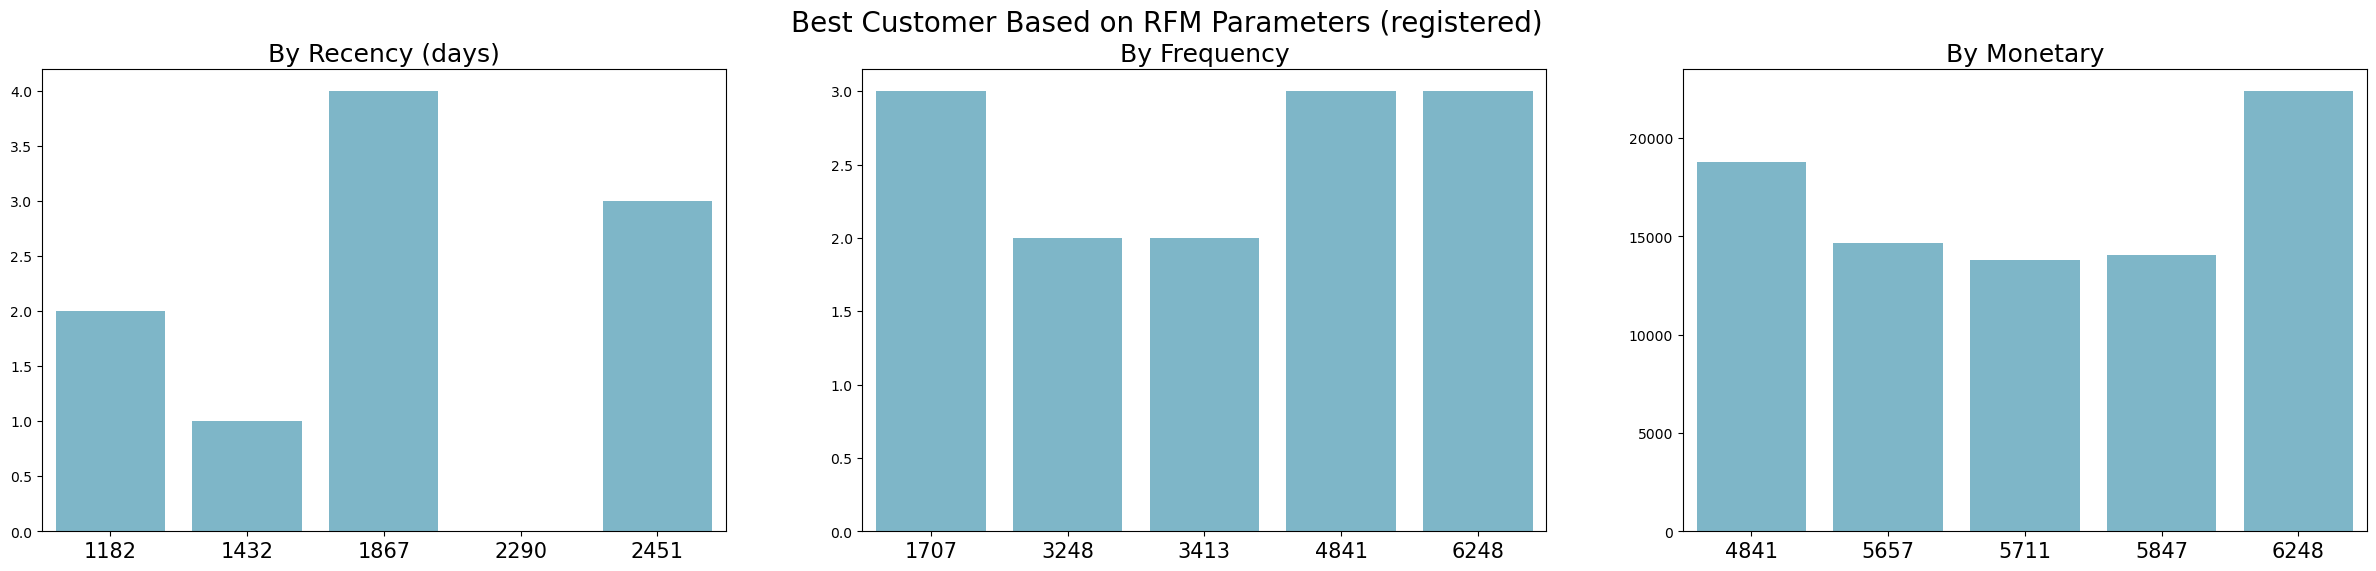

In [160]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="registered", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="registered", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="registered", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (registered)", fontsize=20)
plt.show()

Grafik di atas merupakan hasil RFM analisis (registered) untuk menganalisis best customers. Di sini diurutkan based on recency, frequency, dan monetary. 

Dengan keterangan:
- Recency: parameter yang digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi.
- Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
- Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.

In [161]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,registered,frequency,monetary,recency,r_rank,f_rank,m_rank
0,20,1,22,63,616.0,315.5,1.0
1,416,1,431,704,23.0,315.5,2.0
2,432,1,441,5,674.0,315.5,3.0
3,451,1,754,372,326.0,315.5,9.0
4,472,1,506,705,22.0,315.5,4.0


In [162]:
# Normalisasi ranking customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100
 
rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)
 
rfm_df.head()

,registered,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,20,1,22,63,90.721649,46.533923,0.147275
1,416,1,431,704,3.387334,46.533923,0.294551
2,432,1,441,5,99.263623,46.533923,0.441826
3,451,1,754,372,48.011782,46.533923,1.325479
4,472,1,506,705,3.240059,46.533923,0.589102


In [163]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['registered', 'RFM_score']].head(7)

,registered,RFM_score
0,20,1.34
1,416,0.69
2,432,1.41
3,451,1.05
4,472,0.69
5,491,0.74
6,570,0.98


In [164]:
# Segmentasi customer berdasarkan RFM_score
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['registered', 'RFM_score', 'customer_segment']].head(20)

,registered,RFM_score,customer_segment
0,20,1.34,lost customers
1,416,0.69,lost customers
2,432,1.41,lost customers
3,451,1.05,lost customers
4,472,0.69,lost customers
5,491,0.74,lost customers
6,570,0.98,lost customers
7,573,1.48,lost customers
8,577,0.75,lost customers
9,654,0.72,lost customers


In [165]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).registered.nunique()
customer_segment_df

,customer_segment,registered
0,High value customer,16
1,Low value customers,286
2,Medium value customer,203
3,Top customers,26
4,lost customers,148


In [166]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

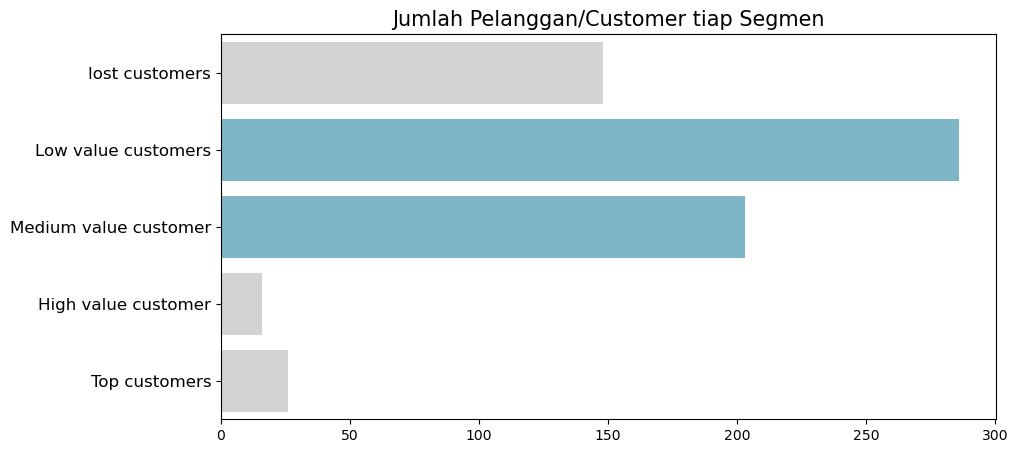

In [167]:
plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3","#72BCD4", "#72BCD4",  "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="registered", 
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Jumlah Pelanggan/Customer tiap Segmen", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Telah dilakukan RFM analisis pada customer yang registered. Didapat hasil pengelompokan customers registered, mulai dari lost, low value, hingga top customers. Tampak jumlah customer tiap segmen tertinggi ada pada low dan medium value customers.